<a href="https://colab.research.google.com/github/kevinvbc/deeproad/blob/main/Multilabel_Classifier_Caltech_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *


In [113]:
path = untar_data(URLs.CALTECH_101)
Path.BASE_PATH = path
path.ls()

(#102) [Path('menorah'),Path('grand_piano'),Path('chair'),Path('schooner'),Path('ceiling_fan'),Path('gerenuk'),Path('ibis'),Path('Faces'),Path('Faces_easy'),Path('watch')...]

### Create Datablock and Dataloaders

In [114]:
Db = DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items = get_image_files,
               splitter = RandomSplitter(valid_pct=0.3, seed=4),  
               get_y=parent_label,
               item_tfms = Resize(460),
               batch_tfms = aug_transforms(size=224, min_scale=0.75))

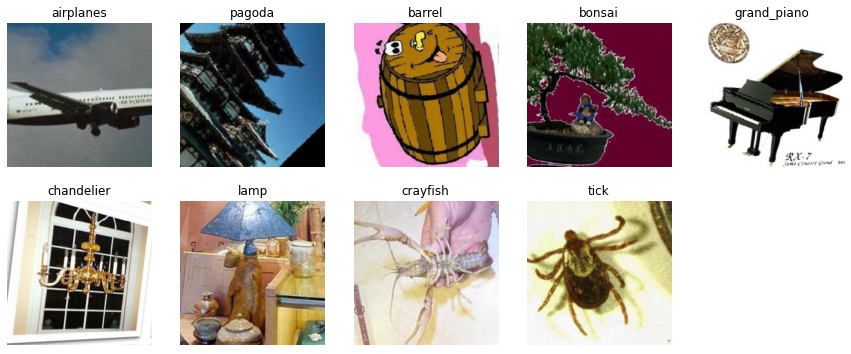

In [115]:
dls = Db.dataloaders(path)
dls.show_batch(nrows=2, ncols=5)


### Check if Datablock was build correctly

In [116]:
Db.summary(path)

Setting-up type transforms pipelines
Found 9144 items
2 datasets of sizes 6401,2743
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/caltech_101/water_lilly/image_0002.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x237
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/caltech_101/water_lilly/image_0002.jpg
    applying parent_label gives
      water_lilly
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(96)

Final sample: (PILImage mode=RGB size=300x237, TensorCategory(96))


Found 9144 items
2 datasets of sizes 6401,2743
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Sett

### Fine-tune model

In [ ]:
learn = cnn_learner(dls, resnet34)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,time
